In [ ]:
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/FYP')

#load original CSV file
df_origin = pd.read_csv('original.csv')
df_origin.head()

Mounted at /content/drive


,Commit ID,Origin Code
0,7ad6162573ba79a4392c63b453ad0220ca6c5ace,"@@ -468,13 +468,12 @@ int _gnutls_ciphertext2c..."
1,055ecbc62878e86287d742c7246c21606cee8183,"@@ -760,7 +760,7 @@ static struct pdo_dbh_meth..."
2,055ecbc62878e86287d742c7246c21606cee8183,"@@ -117,7 +117,7 @@ PHP_METHOD(sqlite3, open)\..."
3,251fc70e9722f931eec23a34030d05ba5f747b0e,"@@ -163,7 +163,8 @@ unpack_Z_stream(int fd_in,..."
4,251fc70e9722f931eec23a34030d05ba5f747b0e,"@@ -0,0 +1,20 @@"


In [ ]:
#load patched CSV file
df_patched = pd.read_csv('patched.csv')
df_patched.head()

,Commit ID,Patched Code
0,7ad6162573ba79a4392c63b453ad0220ca6c5ace,"@@ -468,13 +468,12 @@ int _gnutls_ciphertext2c..."
1,055ecbc62878e86287d742c7246c21606cee8183,"@@ -760,7 +760,7 @@ static struct pdo_dbh_meth..."
2,055ecbc62878e86287d742c7246c21606cee8183,"@@ -117,7 +117,7 @@ PHP_METHOD(sqlite3, open)\..."
3,251fc70e9722f931eec23a34030d05ba5f747b0e,"@@ -163,7 +163,8 @@ unpack_Z_stream(int fd_in,..."
4,251fc70e9722f931eec23a34030d05ba5f747b0e,"@@ -0,0 +1,20 @@\n#!/bin/sh\n# Copyright 2011 ..."


In [ ]:
# Combine the data into a single DataFrame
df_combined = pd.DataFrame({
    'source_code': df_origin['Origin Code'],  # Assuming your original code column is named 'code'
    'target_code': df_patched['Patched Code']  # Assuming your patched code column is named 'code'
})

# Remove rows with any NaN values
df_combined = df_combined.dropna()

# Display the first few rows to ensure the data looks good
df_combined

,source_code,target_code
0,"@@ -468,13 +468,12 @@ int _gnutls_ciphertext2c...","@@ -468,13 +468,12 @@ int _gnutls_ciphertext2c..."
1,"@@ -760,7 +760,7 @@ static struct pdo_dbh_meth...","@@ -760,7 +760,7 @@ static struct pdo_dbh_meth..."
2,"@@ -117,7 +117,7 @@ PHP_METHOD(sqlite3, open)\...","@@ -117,7 +117,7 @@ PHP_METHOD(sqlite3, open)\..."
3,"@@ -163,7 +163,8 @@ unpack_Z_stream(int fd_in,...","@@ -163,7 +163,8 @@ unpack_Z_stream(int fd_in,..."
4,"@@ -0,0 +1,20 @@","@@ -0,0 +1,20 @@\n#!/bin/sh\n# Copyright 2011 ..."
...,...,...
106969,"@@ -178,11 +178,12 @@\nstruct CirrusVGAState;\...","@@ -22,31 +22,65 @@\n* THE SOFTWARE.\n*/\nstat..."
106970,"@@ -22,31 +22,65 @@\n* THE SOFTWARE.\n*/\nstat...","@@ -23,27 +23,29 @@\n*/\n#if DEPTH == 8\n#defi..."
106971,"@@ -23,27 +23,29 @@\n*/\n#if DEPTH == 8\n#defi...","@@ -178,11 +178,12 @@\nstruct CirrusVGAState;\..."
106972,"@@ -178,11 +178,12 @@\nstruct CirrusVGAState;\...","@@ -22,31 +22,65 @@\n* THE SOFTWARE.\n*/\nstat..."


# Install library

In [ ]:
!pip install -q datasets
!pip install -q transformers
!pip install -q sentencepiece
!pip install -q accelerate -U
!pip install -q pandas
!pip install -q datasets
!pip install -q evaluate
!pip install -q scikit-learn
!pip install -q absl-py rouge-score nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install -q pyarrow==14.0.1 datasets --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 18.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.6.1 requires fsspec==2024.6.1, but you have fsspec 2024.3.1 which is incompatible.


In [ ]:
from datasets import Dataset

new_df = df_combined.head(50000)

# Convert the cleaned DataFrame into a Hugging Face Dataset
dataset = Dataset.from_pandas(new_df)

# Split the dataset into training and validation sets
train_test_split = dataset.train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
valid_dataset = train_test_split['test']

# Tokenization

In [ ]:
from transformers import GPT2Tokenizer

# Load the GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Add a padding token for GPT-2 (it doesn't have one by default)
tokenizer.pad_token = tokenizer.eos_token

def tokenize_function_gpt2(examples):
    # Concatenate input (vulnerable code) and target (patched code) into a single sequence
    input_texts = [source + " [SEP] " + target for source, target in zip(examples['source_code'], examples['target_code'])]

    # Tokenize the concatenated sequences
    encodings = tokenizer(input_texts, padding="max_length", truncation=True, max_length=256)

    # Set the labels to be the same as input_ids
    # GPT-2's loss function will automatically shift the input tokens to predict the next token
    encodings['labels'] = encodings['input_ids'].copy()

    return encodings


# Tokenize the train and validation datasets
train_dataset = train_dataset.map(tokenize_function_gpt2, batched=True)
valid_dataset = valid_dataset.map(tokenize_function_gpt2, batched=True)

# Set format for PyTorch (or TensorFlow)
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])
valid_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
from transformers import GPT2LMHeadModel

# Load pre-trained GPT-2 model
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set padding token id
model.config.pad_token_id = tokenizer.eos_token_id

from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # Directory for saving model checkpoints
    evaluation_strategy="epoch",     # Evaluate after each epoch
    learning_rate=5e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    num_train_epochs=3,              # Change based on your dataset size
    weight_decay=0.01,
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,
    save_strategy="no"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import DataCollatorForLanguageModeling

# Define data collator for GPT-2
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False  # We're not using masked language modeling, only standard causal language modeling
)

from transformers import Trainer

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

# Start training
trainer.train()

trainer.save_model("./results/GPT2_model_1")


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss
1,0.273900,0.366436
2,0.348900,0.261270
3,0.274800,0.237112


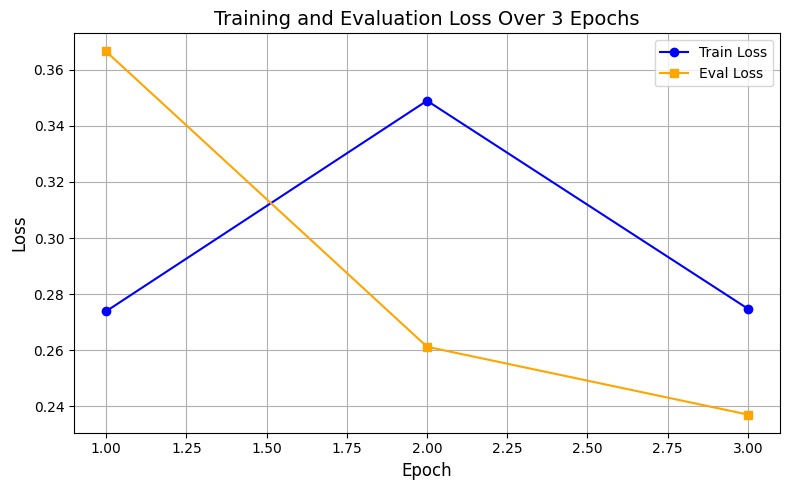

In [1]:
import matplotlib.pyplot as plt

# Data for epochs, training loss, and evaluation loss
epochs = [1, 2, 3]
train_loss = [0.273900, 0.348900, 0.274800]
eval_loss = [0.366436, 0.261270, 0.237112]

# Create figure
plt.figure(figsize=(8, 5))

# Plot training loss
plt.plot(epochs, train_loss, color='blue', marker='o', label='Train Loss')

# Plot evaluation loss
plt.plot(epochs, eval_loss, color='orange', marker='s', label='Eval Loss')

# Add labels and title
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Evaluation Loss Over 3 Epochs', fontsize=14)

# Add grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
from datasets import load_metric

#rouge
rouge = load_metric('rouge')

#bleu
bleu = load_metric('bleu')

def compute_metrics(eval_preds):
    preds, labels = eval_preds

    #get predicted token ids
    if isinstance(preds, tuple):
        preds = preds[0]  # Extract token ids from model output tuple

    #replace -100 in the labels as it is used as a placeholder in some models for ignored tokens
    labels = [[(token if token != -100 else tokenizer.pad_token_id) for token in label] for label in labels]

    #decode the predictions and labels
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    #compute ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)

    #compute BLEU
    bleu_result = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                               references=[[label.split()] for label in decoded_labels])

    #return the results in a dictionary format
    return {
        "rouge1": rouge_result["rouge1"].mid.fmeasure,
        "rouge2": rouge_result["rouge2"].mid.fmeasure,
        "rougeL": rouge_result["rougeL"].mid.fmeasure,
        "bleu": bleu_result["bleu"]
    }

<ipython-input-9-0ef2d69a75eb>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = load_metric('rouge')
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for bleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/bleu/bleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
from transformers import TrainingArguments
from transformers import GPT2LMHeadModel
from transformers import Trainer

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    eval_steps=500,
    per_device_eval_batch_size=1,
    logging_dir="./logs",
    logging_steps=10,
    fp16=True,
    gradient_accumulation_steps=8
)

# Load pre-trained GPT-2 model
model = GPT2LMHeadModel.from_pretrained('./results/GPT2_model_1')

#define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics
)

eval_results = trainer.evaluate()

metrics = ['rouge1', 'rouge2', 'rougeL', 'bleu']

#dataframe
df_GPT2 = pd.DataFrame(eval_results, index=metrics, columns=['Values'])

#display dataframe
df_GPT2

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


,Values
rouge1,0.452312
rouge2,0.411234
rougeL,0.402124
bleu,0.378272


#learning rate of 3e-5

In [ ]:
from transformers import GPT2LMHeadModel

# Load pre-trained GPT-2 model
model = GPT2LMHeadModel.from_pretrained('./results/GPT2_model_1')

# Set padding token id
model.config.pad_token_id = tokenizer.eos_token_id

from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_strategy="no"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import DataCollatorForLanguageModeling

#data collator for GPT-2
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

from transformers import Trainer

#trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

trainer.train()

trainer.save_model("./results/GPT2_model_2")

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss
1,0.265800,0.169269
2,0.226300,0.151409
3,0.287400,0.145289


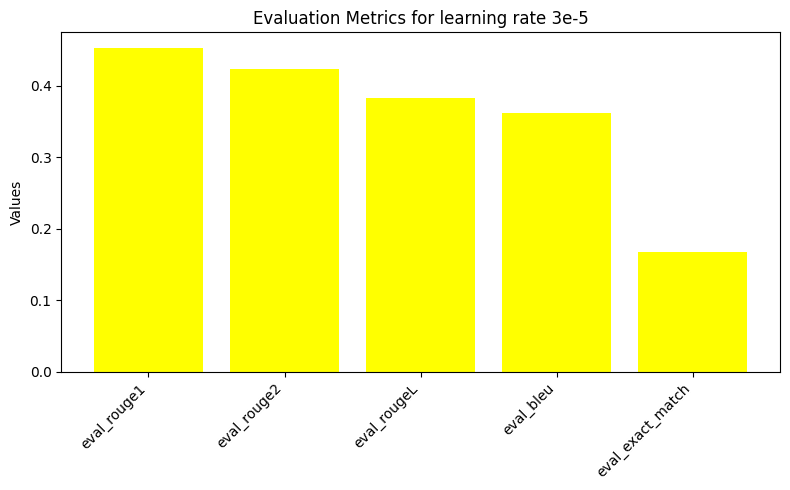

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for both learning rates
metrics = ['eval_rouge1', 'eval_rouge2', 'eval_rougeL', 'eval_bleu', 'eval_exact_match']

# Set width for bars
bar_width = 0.35

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(metrics, values_lr_5e6, color='yellow')

# Add labels and title
plt.ylabel('Values')
plt.title('Evaluation Metrics for learning rate 3e-5')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# learning rate of 5e-6

In [ ]:
from transformers import GPT2LMHeadModel

# Load pre-trained GPT-2 model
model = GPT2LMHeadModel.from_pretrained('./results/GPT2_model_2')

# Set padding token id
model.config.pad_token_id = tokenizer.eos_token_id

from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=5e-6,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_strategy="no"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import DataCollatorForLanguageModeling

#data collator for GPT-2
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

from transformers import Trainer

#trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

trainer.train()

trainer.save_model("./results/GPT2_model_3")

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss
1,0.195800,0.140630
2,0.188000,0.138183
3,0.273600,0.136773


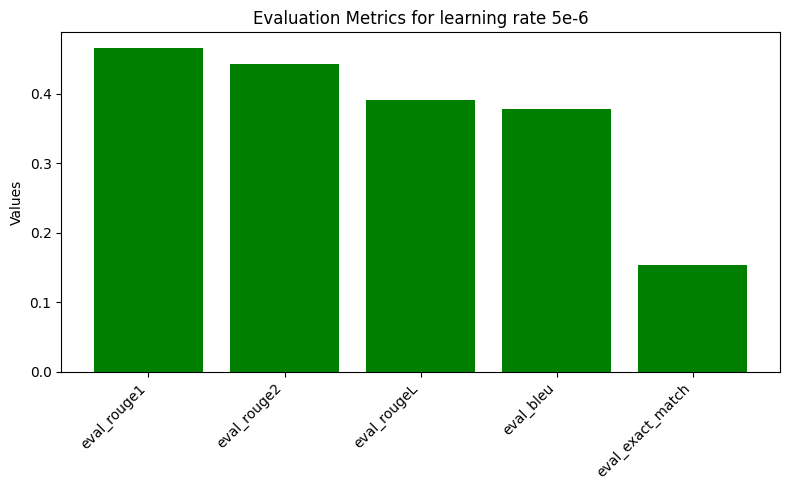

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for both learning rates
metrics = ['eval_rouge1', 'eval_rouge2', 'eval_rougeL', 'eval_bleu', 'eval_exact_match']

# Set width for bars
bar_width = 0.35

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(metrics, values_lr_5e6, color='green')

# Add labels and title
plt.ylabel('Values')
plt.title('Evaluation Metrics for learning rate 5e-6')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()